In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [7]:
import pandas as pd

df = pd.read_csv("/Users/gunveerkalsi/Desktop/loan-default-prediction-ml/data/raw/Loan_Default.csv")
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [8]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
df['Status'].value_counts()


Status
0    112031
1     36639
Name: count, dtype: int64

### Initial Observations
- The dataset contains 148,670 rows and 34 columns.
- The target variable is **Status**, where 0 indicates loan rejection and 1 indicates loan approval.
- Some columns contain missing values.
- Both numerical and categorical features are present.

In [12]:
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [13]:
df['Status'].value_counts(normalize=True)


Status
0    0.753555
1    0.246445
Name: proportion, dtype: float64

### Target Variable Distribution

The dataset is moderately imbalanced. Approximately 75.36% of loan applications are rejected (Status = 0),
while 24.64% are approved (Status = 1). Due to this imbalance, accuracy alone is not a reliable evaluation metric,
and additional metrics such as precision, recall, F1-score, and ROC-AUC will be considered.


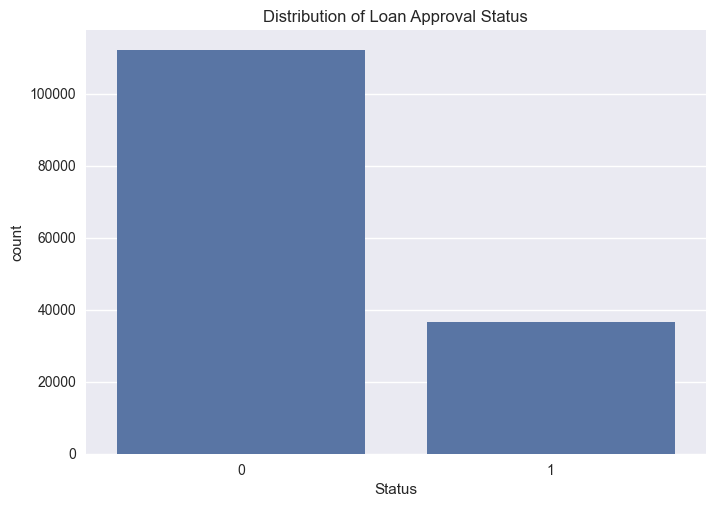

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Status', data=df)
plt.title('Distribution of Loan Approval Status')
plt.show()


In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [19]:
numerical_cols = numerical_cols.drop('Status')

### Feature Types

The dataset consists of both numerical and categorical features. Numerical features include variables such as
loan amount, income, credit score, and interest rates, while categorical features include gender, loan type,
region, and credit-related categories. The target variable **Status** has been excluded from the feature set
to avoid data leakage.


In [22]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
missing_percent


Upfront_charges              0.266644
Interest_rate_spread         0.246445
rate_of_interest             0.245100
dtir1                        0.162245
LTV                          0.101554
property_value               0.101554
income                       0.061546
loan_limit                   0.022493
approv_in_adv                0.006107
submission_of_application    0.001345
age                          0.001345
loan_purpose                 0.000901
Neg_ammortization            0.000814
term                         0.000276
Region                       0.000000
total_units                  0.000000
Security_Type                0.000000
Status                       0.000000
co-applicant_credit_type     0.000000
Credit_Score                 0.000000
credit_type                  0.000000
ID                           0.000000
Secured_by                   0.000000
occupancy_type               0.000000
construction_type            0.000000
year                         0.000000
interest_onl

### Missing Value Analysis

Several numerical features such as interest rate, income, loan-to-value (LTV), and upfront charges
contain missing values ranging from 5% to 27%. Since these variables are financially important,
they are retained and missing values are handled through imputation. Numerical features are imputed
using the median to reduce the influence of outliers, while categorical features are imputed using
the most frequent category.
